In [103]:
import pandas as pd
import keras
from keras import models
from keras.layers import Embedding, Dense, Flatten
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/usef-kh/HousePriceEstimation/master/Bike%20Share%20Data/Data/bike_sharing_daily.csv'

data_df = pd.read_csv(file_path)

data_df['Date_dt'] = pd.to_datetime(data_df['dteday'])
data_small_df = data_df[['Date_dt','cnt','mnth']]
# data_small_df['Day'] = data_small_df['Date_dt'].dt.dayofweek
data_small_df.head() 

# data_small_df = data_small_df.sort_values(by=['Day'])

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [104]:
 data_small_df = data_small_df.sort_values(by=['mnth','Date_dt'])
data_small_df.head() 

,Date_dt,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [105]:
scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,Date_dt,cnt,mnth,cnt_Scaled
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546


In [106]:
 data_small_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [0]:
data_small_df['mnth'] = data_small_df['mnth']-1
data_small_df['mnth'] = data_small_df['mnth'].astype(int)

In [119]:

embedding_size = 6

model = models.Sequential()
model.add(Embedding(input_dim = 12, output_dim = embedding_size, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
model.fit(x = data_small_df['mnth'].as_matrix(), y=data_small_df['cnt_Scaled'].as_matrix() , epochs = 50, batch_size = 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
731/731 [==============================] - 1s 2ms/step - loss: 0.0741 - acc: 0.0014
Epoch 2/50
731/731 [==============================] - 1s 847us/step - loss: 0.0316 - acc: 0.0014
Epoch 3/50
731/731 [==============================] - 1s 833us/step - loss: 0.0317 - acc: 0.0014
Epoch 4/50
731/731 [==============================] - 1s 857us/step - loss: 0.0325 - acc: 0.0014
Epoch 5/50
731/731 [==============================] - 1s 902us/step - loss: 0.0314 - acc: 0.0014
Epoch 6/50
731/731 [==============================] - 1s 796us/step - loss: 0.0315 - acc: 0.0014
Epoch 7/50
731/731 [==============================] - 1s 850us/step - loss: 0.0316 - acc: 0.0014
Epoch 8/50
731/731 [==============================] - 1s 830us/step - loss: 0.0313 - acc: 0.0014
Epoch 9/50
731/731 [==============================] - 1s 826us/step - loss: 0.0315 - acc: 0.0014
Epoch 10/50
731/731 [==============================] - 1s 830us/step - loss: 0.0316 - acc: 0.0014
Epoch 11/50
731/731 [==========

In [120]:
layer = model.get_layer('embedding')
output_embeddings = layer.get_weights()
output_embeddings

[array([[-1.68875962e-01,  1.72837824e-01, -1.30456118e-02,
         -2.35097155e-01,  3.68113145e-02, -1.19398035e-01],
        [-1.45668268e-01,  1.59749493e-01, -4.71131466e-02,
         -1.22840084e-01,  3.11900321e-02, -7.05583617e-02],
        [-3.02052367e-02,  5.12198359e-02,  3.74271697e-03,
         -7.21529648e-02, -6.71226485e-03, -4.76760641e-02],
        [ 3.33581343e-02,  2.30796821e-02, -5.24523901e-03,
         -7.22737564e-03,  3.46075208e-03,  4.59943376e-02],
        [ 5.97571544e-02, -7.03533739e-02, -4.37050803e-05,
          9.15420428e-02,  3.01685999e-03,  3.24270912e-02],
        [ 6.21980093e-02, -1.06542885e-01,  5.56195294e-03,
          1.02868021e-01,  9.77250375e-03,  1.04151607e-01],
        [ 7.78104737e-02, -1.01529025e-01, -2.62297015e-03,
          8.84804726e-02, -2.33892910e-03,  6.09676838e-02],
        [ 5.78102656e-02, -8.19978416e-02, -9.90176341e-04,
          1.00053586e-01, -7.29981461e-04,  1.10571876e-01],
        [ 5.54414503e-02, -6.935

In [121]:
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3','embedding_4', 'embedding_5', 'embedding_6']
output_embeddings_df

,mnth,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6
0,0,-0.168876,0.172838,-0.013046,-0.235097,0.036811,-0.119398
1,1,-0.145668,0.159749,-0.047113,-0.122840,0.031190,-0.070558
2,2,-0.030205,0.051220,0.003743,-0.072153,-0.006712,-0.047676
3,3,0.033358,0.023080,-0.005245,-0.007227,0.003461,0.045994
4,4,0.059757,-0.070353,-0.000044,0.091542,0.003017,0.032427
5,5,0.062198,-0.106543,0.005562,0.102868,0.009773,0.104152
6,6,0.077810,-0.101529,-0.002623,0.088480,-0.002339,0.060968
7,7,0.057810,-0.081998,-0.000990,0.100054,-0.000730,0.110572
8,8,0.055441,-0.069359,-0.001351,0.131041,0.014296,0.100965
9,9,0.058510,-0.055281,0.013723,0.042069,-0.009391,0.049636


In [122]:
output_embeddings_df.iloc[:,1:]

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6
0,-0.168876,0.172838,-0.013046,-0.235097,0.036811,-0.119398
1,-0.145668,0.159749,-0.047113,-0.122840,0.031190,-0.070558
2,-0.030205,0.051220,0.003743,-0.072153,-0.006712,-0.047676
3,0.033358,0.023080,-0.005245,-0.007227,0.003461,0.045994
4,0.059757,-0.070353,-0.000044,0.091542,0.003017,0.032427
5,0.062198,-0.106543,0.005562,0.102868,0.009773,0.104152
6,0.077810,-0.101529,-0.002623,0.088480,-0.002339,0.060968
7,0.057810,-0.081998,-0.000990,0.100054,-0.000730,0.110572
8,0.055441,-0.069359,-0.001351,0.131041,0.014296,0.100965
9,0.058510,-0.055281,0.013723,0.042069,-0.009391,0.049636


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


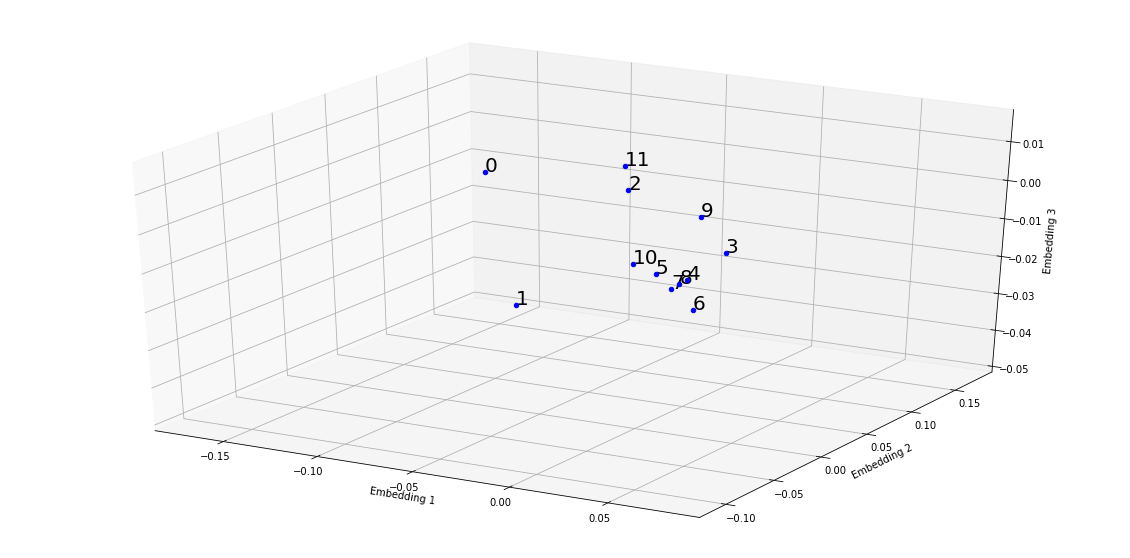

In [123]:
m = output_embeddings_df.iloc[:,1:].as_matrix()
labels = output_embeddings_df.iloc[:,0:1].as_matrix()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()

In [117]:
embedding_size

12